# <font style="font-size:28px;" align="left"><b> Quantum superposition, measurement, and state collapse </b></font>

_prepared by Chee Tian Hou_ $$ \newcommand{\ket}[1]{\left|#1\right\rangle} $$

<br><br><br>

In the previous lecture, we have learned that a quantum state can remain in a <b>superposition state</b> until a <b>measurement</b> is performed. It is a fundamental law of nature that, if an experiment is repeated many times, each possible outcome will appear in a definite fraction of the total trials. This fraction corresponds to a definite <b>probability</b>.

Let us see how is this possible from the perspective of quantum computing.

<hr>

<h3> <b> Experiment 1 </b> </h3> <br>

<h4> Description </h4>

A single qubit always lives in a fixed two-dimensional Hilbert space spanned by $\{\ket{0},\ket{1}\}$.

In quantum computing, we always start a quantum bit (<b>qubit</b>) from state 0, which is denoted as $\ket{0}=\begin{pmatrix}1\\ 0 \end{pmatrix}$.  

An example quantum operator for quantum coin-flipping is Hadamard:
$$ H = \begin{pmatrix}\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{pmatrix} $$

Hadamard gate maps the computational basis states ${\ket{0}, \ket{1}}$ into the <b>superposition</b> basis ${\ket{+}, \ket{-}}$:

$$ H\ket{0} = \frac{1}{\sqrt{2}}\left(\ket{0}+\ket{1}\right), \qquad H\ket{1} = \frac{1}{\sqrt{2}}\left(\ket{0}-\ket{1}\right)  $$

In Qiskit, it is defined as h-gate.





<h4> The circuit with a single Hadamard </h4>

We design a circuit with one qubit and apply quantum coin-flipping once.

In [1]:
# install library
!pip install qiskit qiskit[visualization] qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a4cfd555287d739c77c27b6468d308294cfb9f9832bba2b6d4e7456e55ab3c99
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


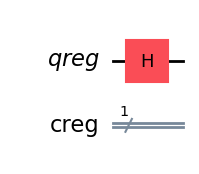

In [2]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

# define a quantum register with one qubit
q =  QuantumRegister(1,"qreg")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c = ClassicalRegister(1,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
qc.h(q[0])

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

Now the qubit is in <b>quantum superposition state</b>.

It can be either in state $\ket{0}$ or $\ket{1}$ until we measure.

The act of <b>measurement</b> will make the superposition <b>state collapses</b> <u>into one definite state.</u>

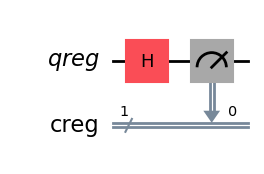

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

# define a quantum register with one qubit
q =  QuantumRegister(1,"qreg")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c = ClassicalRegister(1,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
qc.h(q[0])

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

Let us see how the state collapse by observing the output in 10 trials.

> _Note: The following code block is included only to illustrate the concept of state collapse._

In [ ]:
# Run 10 individual trials
print("\nIndividual Trial Results:")
print("Trial  | Result")
print("-" * 15)

for trial in range(10):
    # Run with only 1 shot per trial
    job = AerSimulator().run(qc, shots=1, memory=True)  # memory=True gives individual results
    result = job.result()
    memory = result.get_memory()  # Get individual measurement outcomes

    # Each trial gives one result like ['0'] or ['1']
    outcome = memory[0]
    print(f"  {trial+1:2}   |   {outcome}")


Individual Trial Results:
Trial  | Result
---------------
   1   |   1
   2   |   1
   3   |   1
   4   |   1
   5   |   0
   6   |   1
   7   |   0
   8   |   1
   9   |   1
  10   |   0


As we can see, each individual trial yields a single definite outcome. This phenomenon is known as <b>state collapse</b>.

By executing the circuit 10,000 times, we can collect measurement statistics and observe the distribution of outcomes.

{'0': 4981, '1': 5019}

State 0 is observed with frequency % 49.81
State 1 is observed with frequency % 50.19



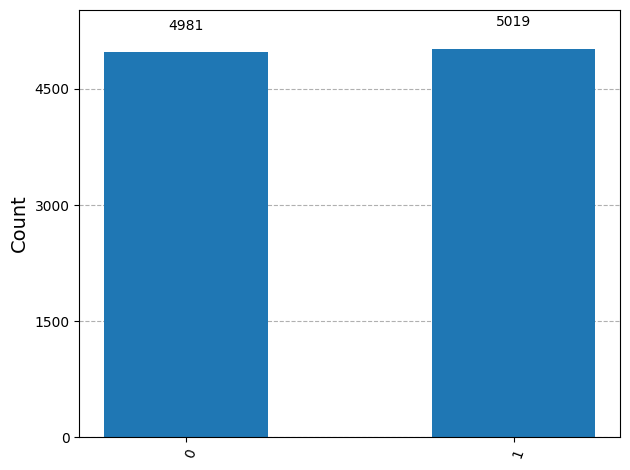

In [ ]:
# execute the circuit 10000 times in the local simulator

job = AerSimulator().run(qc,shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

print()
n_zeros = counts['0']
n_ones = counts['1']
print("State 0 is observed with frequency %",100*n_zeros/(n_zeros+n_ones))
print("State 1 is observed with frequency %",100*n_ones/(n_zeros+n_ones))

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The numbers of outcomes '0's and '1's are expected to be close to each other, since each has probability $50\%$.

<b> As we have observed after this implementation, quantum systems output probabilistically. </b>

<hr>

<h3> <b> Experiment 2</b> </h3> <br>

<h4> The circuit with two Hadamards </h4>

We design a circuit with one qubit and apply quantum coin-flipping twice.


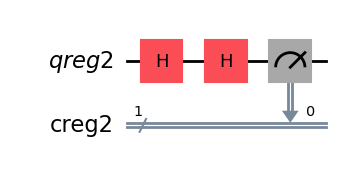

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

# define a quantum register with one qubit
q2 =  QuantumRegister(1,"qreg2")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c2 = ClassicalRegister(1,"creg2")

# define our quantum circuit
qc2 = QuantumCircuit(q2,c2)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
qc2.h(q2[0])

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit once more
qc2.h(q2[0])

# measure the first qubit, and store the result in the first classical bit
qc2.measure(q2,c2)

# draw the circuit by using matplotlib
qc2.draw(output='mpl')

In [ ]:
# execute the circuit 10000 times in the local simulator

job = AerSimulator().run(qc2,shots=10000)
counts2 = job.result().get_counts(qc2)
print(counts2) # print the outcomes

{'0': 10000}


We observe the <u>only outcome</u> is '0'. (Why? Perform calculation to prove this!)

<hr>

<h3><b> Question 1 </b> </h3>

Design a quantum circuit with a single qubit.

Repeat Experiment 1 and 2 (discussed above) with initial state $\ket{1}$.

Compare your results with the previous experiments.

[_Hint:The qubit is initially set to $\ket{0}$ in Qiskit. Set the state of qubit to $\ket{1}$ by using x-gate_ `qc.x(q[0])`]

In [ ]:
# Experiment 1
# Your solution here

In [ ]:
# Experiment 2
# Your solution here